<a href="https://colab.research.google.com/github/Dimildizio/raguelike/blob/main/research/sdxl_topdown_dnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

In [3]:
import torch

from diffusers import DiffusionPipeline, AutoencoderKL
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

lora_url = "https://civitai.com/api/download/models/494622?type=Model&format=SafeTensor"
local_lora_weights = '/content/sdxl_dnd_topdown_tokens.safetensors'

vae_repo = "madebyollin/sdxl-vae-fp16-fix"
sdxl_repo = "stabilityai/stable-diffusion-xl-base-1.0"
inf_steps = 25

#model_id = "RunDiffusion/Juggernaut-XI-v11"
#pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

!wget -q -O sdxl_dnd_topdown_tokens.safetensors {lora_url}

In [ ]:
%%capture
vae = AutoencoderKL.from_pretrained(vae_repo, torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(sdxl_repo, vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to('cuda')
pipe.load_lora_weights(local_lora_weights)
_ = pipe.to("cuda")

In [19]:
inf_steps=25

  0%|          | 0/50 [00:00<?, ?it/s]

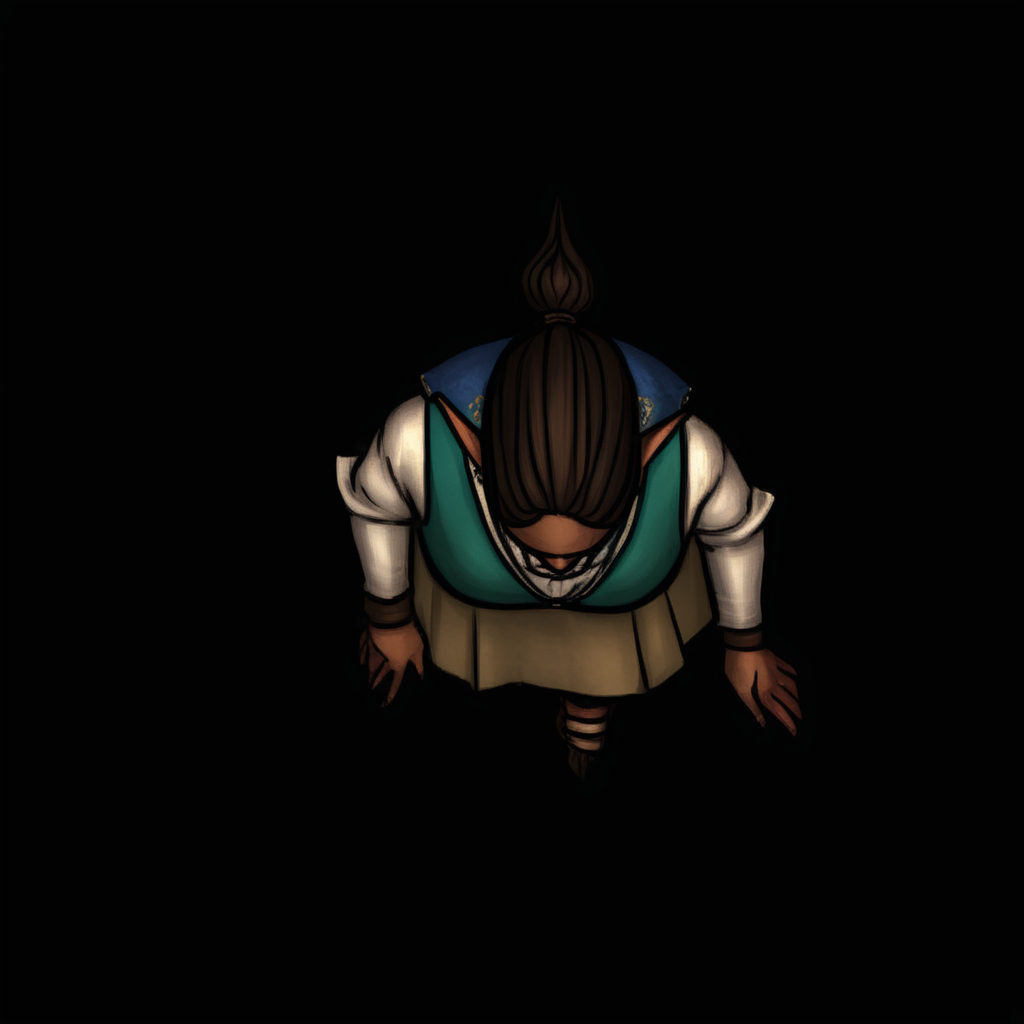

In [21]:
prompt = prompt = 'An elven villager, young woman, commoner dress, happy and playful <lora:SDXL_DnD_Topdown_tokens:1> from above, dnd style' # @param
image = pipe(prompt=prompt, num_inference_steps=inf_steps).images[0]
image